# Classification in Data Science 

## LEC NO. 44) Logistic Regression:

###### Our goal is to build a logistic regression model in Python in order to determine whether candidates would get admitted to a prestigious university based on 'gmat‘ score, ‘gpa', and 'work_experience’

### STEP-1) Importing Required Libraries

1) pandas – used to create the DataFrame to capture the dataset in Python

2) sklearn – used to build the logistic regression model in Python. Here from sklearn.model_selection import train_test_split is useful to split arrays or matrices into random train and test subsets.

3) matplotlib – used to display charts

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### STEP-2) Loading Data 
Gather your data, Let’s look at the dataset.
Here, there are two possible outcomes: Admitted (represented by the value of
‘1’) vs. Rejected (represented by the value of ‘0’).
You can then build a logistic regression in Python,
where:
    
• The 3 independent variables are the GMAT
score, GPA and Years of work experience.    
• The dependent variable represents whether a
person gets admitted or not.

In [4]:
df=pd.read_csv(r"file:///F:\DataScience\admission.csv")
df
#We will make file of only 15 data sets in admission.csv, So our results may change from actual in lecture.

,gmat,gpa,work_exp,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


### STEP-3) Feature Selection
Here, you need to divide the given columns into
two types of variables, dependent(or target
variable or response variable ) and independent
variable(or feature variables).        
Now, set the independent variables (represented as
x) and the dependent variable (represented as y):

In [5]:
x = df[['gmat', 'gpa','work_exp']]
y = df['admitted']
print(x.head(6))

   gmat  gpa  work_exp
0   780  4.0         3
1   750  3.9         4
2   690  3.3         3
3   710  3.7         5
4   680  3.9         4
5   730  3.7         6


In [6]:
print(y.tail(6))

9     0
10    0
11    1
12    1
13    0
14    1
Name: admitted, dtype: int64


### STEP-4) Splitting Data
To understand model performance, dividing the
dataset into a training set and a test set is a good
strategy.
Let's split dataset by using function
train_test_split(). You need to pass 3 parameters.
1) Features(independent variable),
2 ) target, and
3) test_size.

Additionally, you can use random_state to select
records randomly.

In [7]:
# train_test_split() Fn. will return 4 values.
# Here, the Dataset will broke into two parts in a ratioof 75:25.
#It means 75% data will be used for model training and 25% for model testing.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [8]:
x_train

,gmat,gpa,work_exp
14,770,3.3,3
4,680,3.9,4
2,690,3.3,3
13,680,3.3,4
10,610,2.7,3
7,720,3.3,4
11,690,3.7,5
3,710,3.7,5
0,780,4.0,3
5,730,3.7,6


In [9]:
y_train

14    1
4     0
2     0
13    0
10    0
7     1
11    1
3     1
0     1
5     1
12    1
Name: admitted, dtype: int64

In [10]:
print(x_test)

   gmat  gpa  work_exp
1   750  3.9         4
6   690  2.3         1
8   740  3.3         5
9   690  1.7         1


In [11]:
print(y_test)

1    1
6    0
8    1
9    0
Name: admitted, dtype: int64


### STEP-5) Building Logistic Regression Model
First, import the Logistic Regression module and
create a Logistic Regression classifier object using
LogisticRegression() function.               
Then, fit your model on the train set using fit() and
perform prediction on the test set using predict().

In [12]:
# Creating Logistic Regression (LR) object
LR_model= LogisticRegression()

In [13]:
# fit the model with data
LR_model.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_pred=LR_model.predict(x_test)
print(y_pred)

[1 0 1 0]


In [15]:
# or
y_pred

array([1, 0, 1, 0], dtype=int64)

In [16]:
# let's compare with actual values
y_test

1    1
6    0
8    1
9    0
Name: admitted, dtype: int64

### STEP-6) Evaluating Model
Let's estimate, how accurately the classifier or
model can predict the type of cultivars.
Accuracy can be computed by comparing actual
test set values and predicted values.


In [17]:
from sklearn import metrics
print("Accuracy of your RL_model :",metrics.accuracy_score(y_test,y_pred))

Accuracy of your RL_model : 1.0


###### More Predictions Examples (can be Out of sample)

In [18]:
# Let's predict whether the candidate with gmat score of 690, GPA of 3.8 
# and work experience 3 years will get the admission into the university or not.

adm = LR_model.predict([[690,3.8,3]])  # will pass only 2D array
print(adm)

[0]


In [19]:
# Let's predict whether the candidate with gmat score of 600, GPA of 3 
# and work experience 5 years will get the admission into the university or not.

adm = LR_model.predict([[699,0,0]])  # will pass only 2D array
print(adm)

# NOTE:
# In above cases it is much depending on "gmat score" because we have only few data(15 rows data) for train the model, 
# whereas our tutor used minimum of 40 rows data. That's why its predictions may wrong many times.

[1]


### STEP-7) Model Evaluation using Confusion Matrix

A confusion matrix is a table that is used to
evaluate the performance of a classification model.
You can also visualize the performance of an
algorithm. The fundamental of a confusion matrix
is the number of correct and incorrect predictions
are summed up class-wise.

In the case of binary classification, the confusion
matrix shows the numbers of the following:

1) True negatives in the upper-left position: 
We predicted no, and they don’t get admission. 

2) False negatives in the lower-left position: 
We predicted no, but they actually get the admission.

3) False positives in the upper-right position: 
We predicted yes, but they don’t get the admission.

4) True positives in the lower-right position: 
These are cases in which we predicted and they get the admission.

Here, you can see the confusion matrix in the form
of the array object. The dimension of this matrix is
2*2 because this model is binary classification. You
have two classes 0 and 1. Diagonal values
represent accurate predictions, while non-diagonal
elements are inaccurate predictions. In the output,
2 and 2 are correct predictions, and 0 and 0 are
incorrect predictions.

This means out of 4, we got 4 correct prediction
and 0 incorrect prediction.

In [20]:
# comparing the y_pred(predicted values) with y_test(actual values)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Diagonal values's SUM will show total no. of correct predictions.")
cnf_matrix

Diagonal values's SUM will show total no. of correct predictions.


array([[2, 0],
       [0, 2]], dtype=int64)

### STEP-8) Visualizing Confusion Matrix using Heatmap :
        
Let's visualize the results of the model in the form
of a confusion matrix using matplotlib and seaborn.


In [21]:
# The %matplotlib inline will make your plot outputs appear and be stored
# within the notebook.
import seaborn as sb
%matplotlib inline

Text(0.5, 15.0, 'Predicted label')

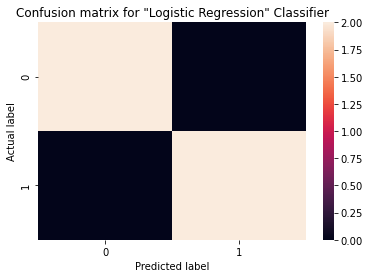

In [22]:
sb.heatmap(pd.DataFrame(cnf_matrix))
plt.title('Confusion matrix for "Logistic Regression" Classifier')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 15.0, 'Predicted label')

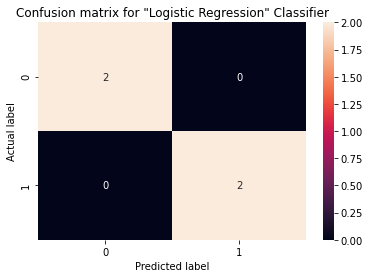

In [24]:
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True)
plt.title('Confusion matrix for "Logistic Regression" Classifier')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

###### Here annot – an array of same shape as data which is used to annotate the heatmap.
> Annotate :add notes to (a text or diagram) giving explanation or comment